In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
#Inferences:
#1. In the line plot of tumor volume vs timepoint for mouse T565, it is seen that the Capomulin treatment is effective
# in reducing the tumor volume as expected,from timepoint=10 to timepoint=30.However, from 0 to 10 and from 10 to 45,
# the tumor volume actually increases.The reason may be the the initial effectiveness and response time of the drug or 
# the advancement of the cancer disease after timepont 30 or tumor volume measurement error    
#2: Of all the drug regimen in the Summary Statistics table,Capomulin has the lowest standard deviation,indicating it is 
# closest to the mean.This tells us that the drug efficacy of Capomulin and method of experiment of this group is reliable
# compared to other drugs   
#3 The pie chart tells us that males and female mouses have been equally distributed in the study overall
#4 In the scatter plot, we see the tumor volume has generally increased with mouse weight
#5 The scatter plot follows a straight line as per the regression analysis  

In [3]:
#magic function notebook
%matplotlib notebook 

In [4]:
# Combine the data into a single dataset
combined_mouse_data=pd.merge(mouse_metadata,study_results,on='Mouse ID')

In [5]:
# Display the data table for preview
combined_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice.
number_of_mice=combined_mouse_data['Mouse ID'].nunique()
print(number_of_mice)

249


In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
get_duplicate_of_mouseid_timepoint=combined_mouse_data[combined_mouse_data.duplicated(['Mouse ID','Timepoint'])]
print(get_duplicate_of_mouseid_timepoint)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_mouse_data=combined_mouse_data.drop_duplicates(subset=['Mouse ID','Timepoint'],keep='first')
clean_combined_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
#Checking the number of mice in the clean DataFrame
number_of_mice_clean=clean_combined_mouse_data['Mouse ID'].nunique()
print(number_of_mice_clean)

249


In [10]:
#group the data by drug regimen 
grouped_by_regimen=clean_combined_mouse_data.groupby(by=['Drug Regimen'])
grouped_by_regimen.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
692,c580,Ketapril,Male,22,25,10,47.570174,1
693,c580,Ketapril,Male,22,25,15,51.991708,1
694,c580,Ketapril,Male,22,25,20,55.575322,2
695,c580,Ketapril,Male,22,25,25,56.289062,2


In [11]:
# Calculate the number of males and females in the study
male_female_numbers=clean_combined_mouse_data.groupby(by=['Sex']).count()
print(male_female_numbers)

        Mouse ID  Drug Regimen  Age_months  Weight (g)  Timepoint  \
Sex                                                                 
Female       930           930         930         930        930   
Male         958           958         958         958        958   

        Tumor Volume (mm3)  Metastatic Sites  
Sex                                           
Female                 930               930  
Male                   958               958  


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_summary=clean_combined_mouse_data.groupby(by=['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median_summary=clean_combined_mouse_data.groupby(by=['Drug Regimen'])['Tumor Volume (mm3)'].median()
variance_summary=clean_combined_mouse_data.groupby(by=['Drug Regimen'])['Tumor Volume (mm3)'].var()
std_dev_summary=clean_combined_mouse_data.groupby(by=['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem_summary=clean_combined_mouse_data.groupby(by=['Drug Regimen'])['Tumor Volume (mm3)'].sem()
summary_statistics_df=pd.DataFrame({'Mean': mean_summary,
                                    'Median': median_summary,
                                    'Variance': variance_summary,
                                    'Std.Deviation': std_dev_summary,
                                    'SEM':sem_summary},
                                   index=['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol'])

summary_statistics_df.index.name='Drug Regimen'
summary_statistics_df                                   

,Mean,Median,Variance,Std.Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
#Calculate the total number of mice involved in the study 
number_of_mice_in_study_by_regimen= grouped_by_regimen['Timepoint'].count() 
print(number_of_mice_in_study_by_regimen)

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64


In [14]:
# Find relationship between drug regimen and number of mice. 
number_of_mice_grouped_by_regimen=clean_combined_mouse_data.groupby(by=['Drug Regimen'])['Mouse ID'].nunique()
print(number_of_mice_grouped_by_regimen)

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     25
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64


In [15]:
# Filter the DataFrame down only to those columns to chart
regimen_vs_mice_df = grouped_by_regimen[["Drug Regimen","Timepoint"]]

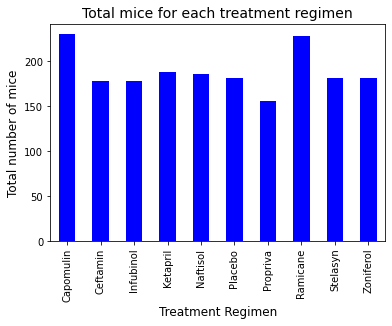

<Figure size 432x288 with 0 Axes>

In [44]:
# Generate a bar plot showing the total number of mice for each treatment regimen throughout the course of the study using pandas.# Define the data required 
#Define data
regimen_vs_mice_df=pd.DataFrame({'Treatment Regimen': ['Capomulin', 'Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol'],
                                 'Total number of mice':[230,178,178,188,186,181,156,228,181,182]})
#set the index so drug names will be printed
regimen_vs_mice_df1=regimen_vs_mice_df.set_index('Treatment Regimen')

#specify how you want the chart to be printed  

plt.title('Total mice for each treatment regimen',fontsize=14,color='black')
plt.xlabel('Treatment Regimen',fontsize=12,color='black')
plt.ylabel('Total number of mice',fontsize=12,color='black')
regimen_vs_mice_df1['Total number of mice'].plot(kind='bar',figsize=(6,4),color='b')
plt.show()
plt.tight_layout()

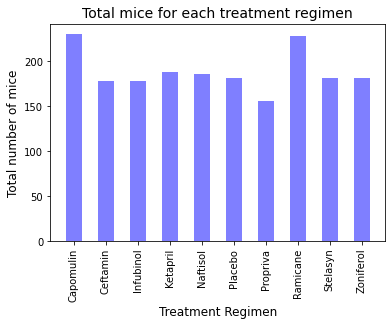

In [17]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot
# Define the new data

#magic function inline backend  
%matplotlib inline

drug_regimen=['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
number_of_mice=[230,178,178,188,186,181,156,228,181,182]

# Set x axis and tick locations
x_axis = np.arange(len(drug_regimen))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(6,4))
plt.bar(x_axis, number_of_mice, width=.5,alpha=0.5,color="b",align="center")
plt.xticks(tick_locations, drug_regimen, rotation="vertical")

# Set a Title and labels
plt.title("Total mice for each treatment regimen",fontsize=14,color='black')
plt.xlabel("Treatment Regimen",fontsize=12,color='black')
plt.ylabel("Total number of mice",fontsize=12,color='black')

# show the graph
plt.show()

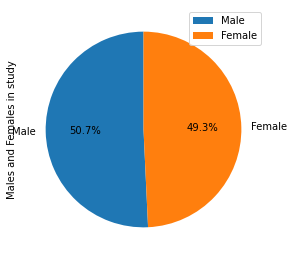

In [18]:
#define data for pie plot
male_female_data = {'Males and Females in study': [958,930]}
male_female_df = pd.DataFrame(male_female_data,columns=['Males and Females in study'],index = ['Male','Female'])
#specify the format and plot pie plot
male_female_df.plot.pie(y='Males and Females in study',figsize=(4.50, 4.50),autopct='%1.1f%%', startangle=90)
plt.show()

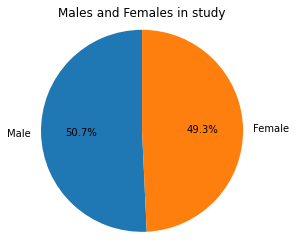

In [19]:
#magic function inline backend  
%matplotlib inline
#define data for pie plot
male_female_data1= [958,930]
my_labels = ['Male','Female']

#specify format and plot pie plot
plt.pie(male_female_data1,labels=my_labels,autopct='%1.1f%%',startangle=90)
plt.title('Males and Females in study')
plt.axis('equal')
fig=plt.gcf()
fig.set_size_inches(4.0,4.0)
plt.show()

In [20]:
#Pie plots for each regimen showing male trials and female trials
# Filter the DataFrame down only to columns "Drug Regimen" and "Sex" to chart
filter_by_drug_and_sex=clean_combined_mouse_data[['Drug Regimen','Sex']]
grouped_by_drug_and_sex=filter_by_drug_and_sex.groupby(by='Drug Regimen')['Sex'].value_counts()
print(grouped_by_drug_and_sex)

Drug Regimen  Sex   
Capomulin     Female    128
              Male      102
Ceftamin      Female     92
              Male       86
Infubinol     Female     95
              Male       83
Ketapril      Male      130
              Female     58
Naftisol      Male      100
              Female     86
Placebo       Female    102
              Male       79
Propriva      Male       87
              Female     69
Ramicane      Male      154
              Female     74
Stelasyn      Female    107
              Male       74
Zoniferol     Female    119
              Male       63
Name: Sex, dtype: int64


<Figure size 216x216 with 0 Axes>

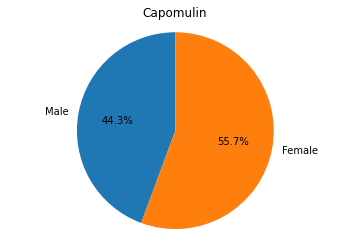

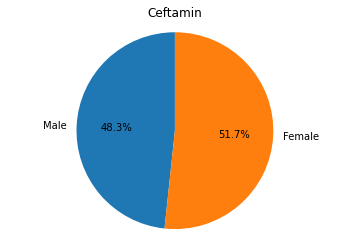

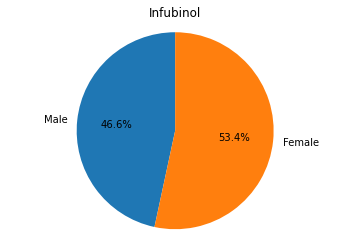

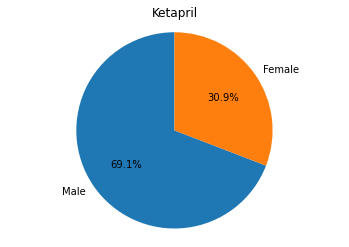

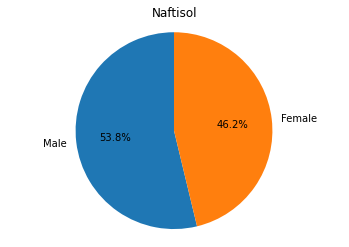

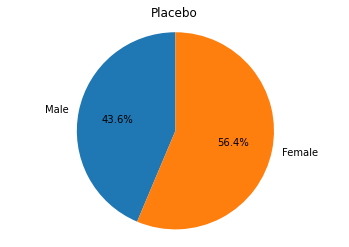

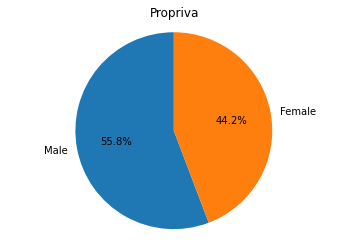

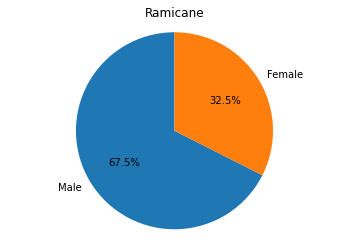

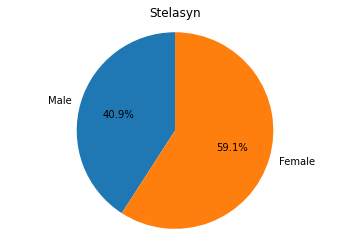

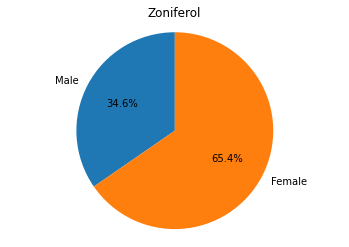

In [21]:
#Distribution of male and female in each drug treatment
#magic function inline backend  
%matplotlib inline

fig=plt.figure(figsize=(3,3))

my_labels = ['Male','Female']

#plot pie chart for male female distribution for Capomulin
ratio1=[102,128]
fig1,ax1=plt.subplots()
ax1.pie(ratio1,labels=my_labels,autopct='%1.1f%%',startangle=90,radius=100)
plt.title('Capomulin')
ax1.axis('equal')

ratio2=[86,92]
fig2,ax2=plt.subplots()
ax2.pie(ratio2,labels=my_labels,autopct='%1.1f%%',startangle=90)
plt.title('Ceftamin')
ax2.axis('equal')

ratio3=[83,95]
fig3,ax3=plt.subplots()
ax3.pie(ratio3,labels=my_labels,autopct='%1.1f%%',startangle=90)
plt.title('Infubinol')
ax3.axis('equal')

ratio4=[130,58]
fig4,ax4=plt.subplots()
ax4.pie(ratio4,labels=my_labels,autopct='%1.1f%%',startangle=90)
plt.title('Ketapril')
ax4.axis('equal')

ratio5=[100,86]
fig5,ax5=plt.subplots()
ax5.pie(ratio5,labels=my_labels,autopct='%1.1f%%',startangle=90)
plt.title('Naftisol')
ax5.axis('equal')

ratio6=[79,102]
fig6,ax6=plt.subplots()
ax6.pie(ratio6,labels=my_labels,autopct='%1.1f%%',startangle=90)
plt.title('Placebo')
ax6.axis('equal')

ratio7=[87,69]
fig7,ax7=plt.subplots()
ax7.pie(ratio7,labels=my_labels,autopct='%1.1f%%',startangle=90)
plt.title('Propriva')
ax7.axis('equal')

ratio8=[154,74]
fig8,ax8=plt.subplots()
ax8.pie(ratio8,labels=my_labels,autopct='%1.1f%%',startangle=90)
plt.title('Ramicane')
ax8.axis('equal')

ratio9=[74,107]
fig9,ax9=plt.subplots()
ax9.pie(ratio9,labels=my_labels,autopct='%1.1f%%',startangle=90)
plt.title('Stelasyn')
ax9.axis('equal')

ratio10=[63,119]
fig10,ax10=plt.subplots()
ax10.pie(ratio10,labels=my_labels,autopct='%1.1f%%',startangle=90)
plt.title('Zoniferol')
ax10.axis('equal')

plt.show()

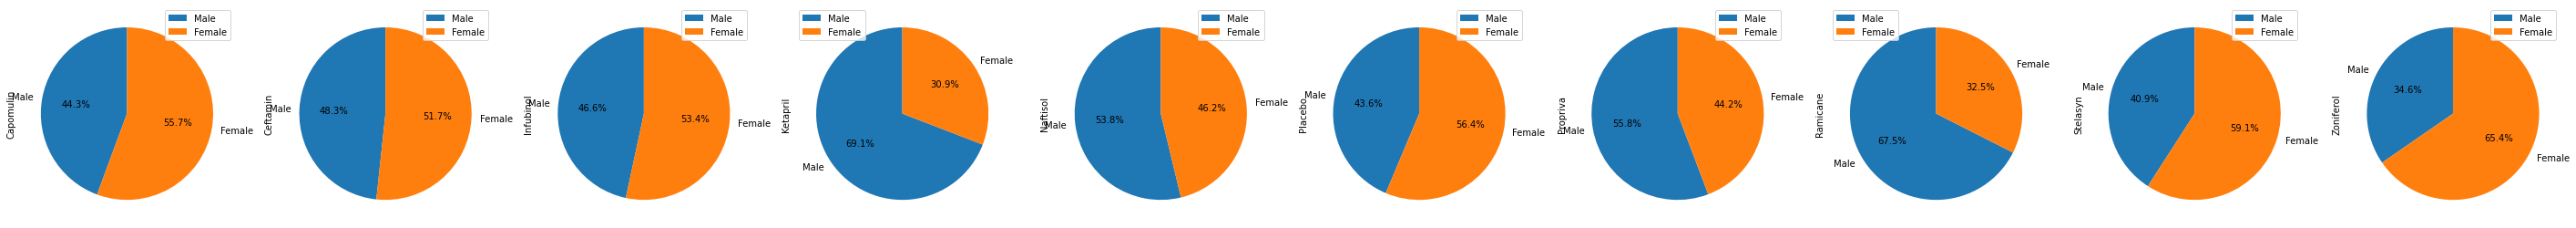

In [22]:
df2=pd.DataFrame({'Capomulin':[102,128],'Ceftamin':[86,92], 'Infubinol': [83,95],'Ketapril': [130,58],'Naftisol':[100,86], 
                              'Placebo': [79,102],'Propriva':[87,69],'Ramicane':[154,74],'Stelasyn':[74,107],'Zoniferol':[63,119]},
                   index=['Male','Female'])  
plot=df2.plot.pie(subplots=True,figsize=(50,25),autopct='%1.1f%%',startangle=90)

In [23]:
# Selecting a mouse with Capomulin as treatment regimen
# This will change every time you run this In[]
capomulin_select=clean_combined_mouse_data[clean_combined_mouse_data['Drug Regimen']=='Capomulin']
sample_select=capomulin_select.sample()
print(sample_select)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
313     j246    Capomulin  Female          21          21         15   

     Tumor Volume (mm3)  Metastatic Sites  
313           43.312654                 0  


In [24]:
#Get study data for t565 mouse
t565=clean_combined_mouse_data[clean_combined_mouse_data['Mouse ID']=='t565']
print(t565)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
155     t565    Capomulin  Female          20          17          0   
156     t565    Capomulin  Female          20          17          5   
157     t565    Capomulin  Female          20          17         10   
158     t565    Capomulin  Female          20          17         15   
159     t565    Capomulin  Female          20          17         20   
160     t565    Capomulin  Female          20          17         25   
161     t565    Capomulin  Female          20          17         30   
162     t565    Capomulin  Female          20          17         35   
163     t565    Capomulin  Female          20          17         40   
164     t565    Capomulin  Female          20          17         45   

     Tumor Volume (mm3)  Metastatic Sites  
155           45.000000                 0  
156           45.895647                 0  
157           46.749006                 0  
158           44.440949        

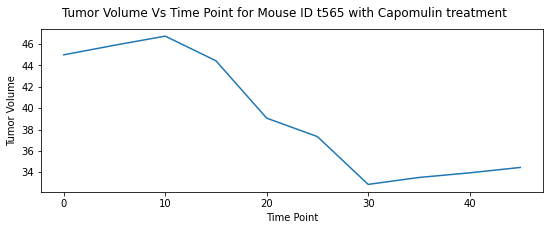

In [25]:
#Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#magic function inline backend
%matplotlib inline

#define data for line plot
time_point=[0,5,10,15,20,25,30,35,40,45]
tumor_volume=[45.000000,45.895647,46.749006,44.440949,39.070214,37.342210,32.868916,33.515671,33.949341,34.455298]

#specify the format and draw line plot
plt.figure(figsize=(9,3))
plt.plot(time_point, tumor_volume)
plt.suptitle('Tumor Volume Vs Time Point for Mouse ID t565 with Capomulin treatment')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume')
plt.show()

In [26]:
#calculate tumor volume by Mouse ID for Capomulin
capomulin_select_by_id=capomulin_select.groupby(by=['Mouse ID'])['Tumor Volume (mm3)'].mean()
print(capomulin_select_by_id)

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64


In [27]:
#calculate weight of mouse by Mouse ID in Capomulin study
capomulin_select_by_weight=capomulin_select.groupby(by=['Mouse ID'])['Weight (g)'].max()
print(capomulin_select_by_weight)

Mouse ID
b128    22
b742    21
f966    17
g288    19
g316    22
i557    24
i738    20
j119    23
j246    21
l509    21
l897    19
m601    17
m957    19
r157    25
r554    17
r944    25
s185    17
s710    23
t565    17
u364    17
v923    21
w150    23
w914    21
x401    15
y793    17
Name: Weight (g), dtype: int64


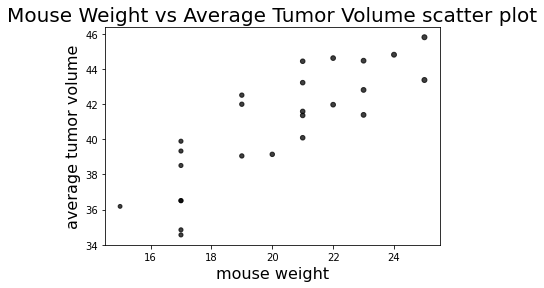

In [28]:
#Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#magic function inline backend
%matplotlib inline

#define data for scatter plot
mouse_weight=[22,21,17,19,22,24,20,23,21,21,19,17,19,25,17,25,17,23,17,17,21,23,21,15,17]
average_tumor_volume=[41.963636,40.083699,36.505973,41.990097,44.613344,44.805810,39.141053,44.465236,43.216925,
    44.434474,42.507261,34.847470,39.049816,45.798970,36.509212,43.367364,34.559143,42.803733,
    39.328725,39.887495,41.581595,41.384825,41.352452,36.182040,38.506829]

#specify the format and plot scatter plot
plt.xlabel('mouse weight', fontsize=16)
plt.ylabel('average tumor volume', fontsize=16)
plt.title('Mouse Weight vs Average Tumor Volume scatter plot',fontsize=20)
plt.scatter(mouse_weight, average_tumor_volume, marker="o", facecolors="black", edgecolors="black",
            s=mouse_weight, alpha=0.75)
plt.show()

In [29]:
#Calculate the correlation coefficient
correlation=st.pearsonr(mouse_weight,average_tumor_volume)
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(correlation[0],2)}")

The correlation coefficient between mouse weight and average tumor volume is 0.84


The equation of the regression line is: y=0.95x + 21.55


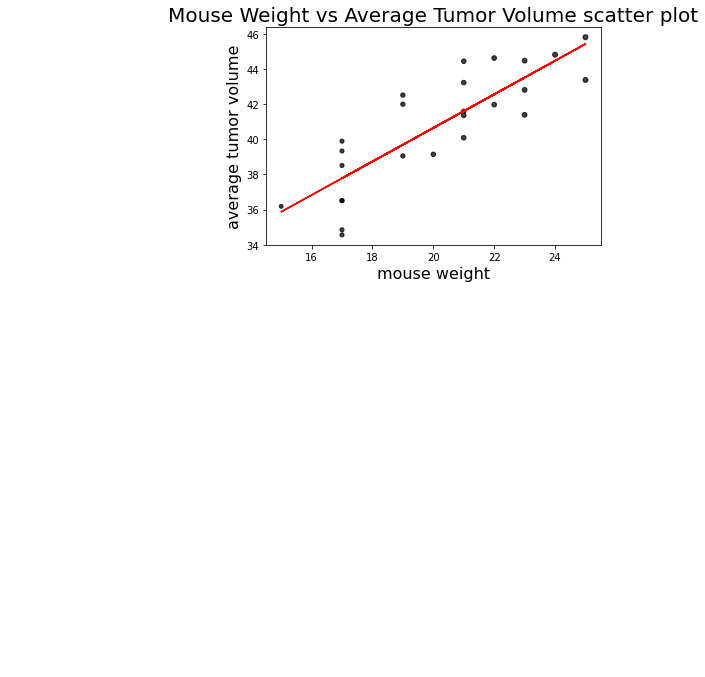

In [32]:
# Add the linear regression equation and line to the scatter plot
x_values = mouse_weight
y_values = average_tumor_volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = np.array(x_values) * slope + np.array(intercept)
line_eq =f'y={str(round(slope,2))}x + {str(round(intercept,2))}'
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('mouse weight', fontsize=16)
plt.ylabel('average tumor volume', fontsize=16)
plt.title('Mouse Weight vs Average Tumor Volume scatter plot',fontsize=20)
plt.scatter(x_values, y_values, marker="o", facecolors="black", edgecolors="black",
            s=mouse_weight, alpha=0.75)
print(f"The equation of the regression line is: {line_eq}")
plt.show()

In [33]:
#We are only selecting the most promising drug candidates Capomulin,Ramicane,Infubinol and Ceftamin
capomulin_select=clean_combined_mouse_data[clean_combined_mouse_data['Drug Regimen']=='Capomulin']
ramicane_select=clean_combined_mouse_data[clean_combined_mouse_data['Drug Regimen']=='Ramicane']
infubinol_select=clean_combined_mouse_data[clean_combined_mouse_data['Drug Regimen']=='Infubinol']
ceftamin_select=clean_combined_mouse_data[clean_combined_mouse_data['Drug Regimen']=='Ceftamin']

In [34]:
#Calculate and sort final tumor volumes for Capomulin 
capomulin_final_tumor_volumes=capomulin_select.loc[capomulin_select.groupby('Mouse ID').Timepoint.idxmax()]
capomulin_sorted=capomulin_final_tumor_volumes.sort_values(by=['Tumor Volume (mm3)'])
print(capomulin_sorted)

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
19       s185    Capomulin  Female           3          17         45   
39       m601    Capomulin    Male          22          17         45   
29       x401    Capomulin  Female          16          15         45   
64       f966    Capomulin    Male          16          17         20   
104      u364    Capomulin    Male          18          17         45   
124      y793    Capomulin    Male          17          17         45   
134      r554    Capomulin  Female           8          17         45   
144      m957    Capomulin  Female           3          19         45   
164      t565    Capomulin  Female          20          17         45   
224      w914    Capomulin    Male          24          21         45   
244      g288    Capomulin    Male           3          19         45   
204      i738    Capomulin  Female          23          20         45   
337      j119    Capomulin  Female           7     

In [35]:
#Calculate and sort final tumor volumes for Ramicane 
ramicane_final_tumor_volumes=ramicane_select.loc[ramicane_select.groupby('Mouse ID').Timepoint.idxmax()]
ramicane_sorted=ramicane_final_tumor_volumes.sort_values(by=['Tumor Volume (mm3)'])
print(ramicane_sorted)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
9       k403     Ramicane    Male          21          16         45   
49      g791     Ramicane    Male          11          16         45   
59      s508     Ramicane    Male           1          17         45   
74      m546     Ramicane    Male          18          16         45   
84      z578     Ramicane    Male          11          16         45   
114     n364     Ramicane    Male           4          17         45   
94      j913     Ramicane  Female           4          17         45   
174     a644     Ramicane  Female           7          17         45   
154     c758     Ramicane    Male           9          17         45   
184     i177     Ramicane    Male          10          18         45   
194     j989     Ramicane    Male           8          19         45   
254     i334     Ramicane  Female           8          20         45   
262     q610     Ramicane  Female          18          21       

In [36]:
#Calculate and sort final tumor volumes for Infubinol 
infubinol_final_tumor_volumes=infubinol_select.loc[infubinol_select.groupby('Mouse ID').Timepoint.idxmax()]
infubinol_sorted=infubinol_final_tumor_volumes.sort_values(by=['Tumor Volume (mm3)'])
print(infubinol_sorted)

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
669      c326    Infubinol  Female          18          25          5   
1314     o813    Infubinol    Male          24          28          5   
1616     v339    Infubinol    Male          20          26          5   
1205     m756    Infubinol    Male          19          30          5   
1683     w193    Infubinol    Male          22          30         20   
1640     v766    Infubinol    Male          16          27         15   
1632     v719    Infubinol  Female          17          30         20   
1397     q132    Infubinol  Female           1          30         30   
1312     o809    Infubinol    Male           3          25         35   
1485     s121    Infubinol    Male          23          26         25   
530      a577    Infubinol  Female           6          25         30   
1726     w584    Infubinol    Male           3          29         30   
1225     n671    Infubinol    Male          18     

In [37]:
#Calculate and sort final tumor volumes for Ceftamin 
ceftamin_final_tumor_volumes=ceftamin_select.loc[ceftamin_select.groupby('Mouse ID').Timepoint.idxmax()]
ceftamin_sorted=ceftamin_final_tumor_volumes.sort_values(by=['Tumor Volume (mm3)'])
print(ceftamin_sorted)

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
1743     x226     Ceftamin    Male          23          28          0   
594      b447     Ceftamin    Male           2          30          0   
1583     u153     Ceftamin  Female          11          25          0   
1551     t573     Ceftamin  Female          15          27          0   
1122     l558     Ceftamin  Female          13          30         10   
940      h531     Ceftamin    Male           5          27          5   
840      f436     Ceftamin  Female           3          25         15   
1582     u149     Ceftamin    Male          24          29         25   
617      b759     Ceftamin  Female          12          25         30   
600      b487     Ceftamin  Female           6          28         25   
1119     l490     Ceftamin    Male          24          26         30   
1260     o287     Ceftamin    Male           2          28         45   
1132     l661     Ceftamin    Male          18     

In [38]:
capomulin_volumes=capomulin_sorted['Tumor Volume (mm3)']
ramicane_volumes=ramicane_sorted['Tumor Volume (mm3)']
infubinol_volumes=infubinol_sorted['Tumor Volume (mm3)']
ceftamin_volumes=ceftamin_sorted['Tumor Volume (mm3)']

In [39]:
# we use pandas to give quartile calculations for Capomulin
quartiles_capomulin = capomulin_volumes.quantile([.25,.5,.75])
lowerq_capomulin = quartiles_capomulin[0.25]
upperq_capomulin = quartiles_capomulin[0.75]
iqr_capomulin = upperq_capomulin-lowerq_capomulin

#print the quartlies for Capomulin
print(f"The lower quartile of tumor volumes for Capomulin  is: {lowerq_capomulin}")
print(f"The upper quartile of tumor volumes for Capomulin is: {upperq_capomulin}")
print(f"The interquartile range of tumor volumes for Capomulin is: {iqr_capomulin}")
print(f"The median of temperatures is: {quartiles_capomulin[0.5]} ")

lower_bound_capomulin = lowerq_capomulin - (1.5*iqr_capomulin)
upper_bound_capomulin = upperq_capomulin + (1.5*iqr_capomulin)
print(f"Values below {lower_bound_capomulin} could be outliers.")
print(f"Values above {upper_bound_capomulin} could be outliers.")

The lower quartile of tumor volumes for Capomulin  is: 32.37735684
The upper quartile of tumor volumes for Capomulin is: 40.1592203
The interquartile range of tumor volumes for Capomulin is: 7.781863460000004
The median of temperatures is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [40]:
# we use pandas to give quartile calculations for Ramicane
quartiles_ramicane = ramicane_volumes.quantile([.25,.5,.75])
lowerq_ramicane = quartiles_ramicane[0.25]
upperq_ramicane = quartiles_ramicane[0.75]
iqr_ramicane = upperq_ramicane-lowerq_ramicane

#print the quartlies for Ramicane
print(f"The lower quartile of tumor volumes for Ramicane  is: {lowerq_ramicane}")
print(f"The upper quartile of tumor volumes for Ramicane is: {upperq_ramicane}")
print(f"The interquartile range of tumor volumes for Ramicane is: {iqr_ramicane}")
print(f"The median of temperatures is: {quartiles_ramicane[0.5]} ")

lower_bound_ramicane = lowerq_ramicane - (1.5*iqr_ramicane)
upper_bound_ramicane = upperq_ramicane + (1.5*iqr_ramicane)
print(f"Values below {lower_bound_ramicane} could be outliers.")
print(f"Values above {upper_bound_ramicane} could be outliers.")

The lower quartile of tumor volumes for Ramicane  is: 31.56046955
The upper quartile of tumor volumes for Ramicane is: 40.65900627
The interquartile range of tumor volumes for Ramicane is: 9.098536719999998
The median of temperatures is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [41]:
# we use pandas to give quartile calculations for Infubinol
quartiles_infubinol = infubinol_volumes.quantile([.25,.5,.75])
lowerq_infubinol = quartiles_infubinol[0.25]
upperq_infubinol = quartiles_infubinol[0.75]
iqr_infubinol = upperq_infubinol-lowerq_infubinol

#print the quartlies for Infubinol
print(f"The lower quartile of tumor volumes for Infubinol  is: {lowerq_infubinol}")
print(f"The upper quartile of tumor volumes for Infubinol is: {upperq_infubinol}")
print(f"The interquartile range of tumor volumes for Infubinol is: {iqr_infubinol}")
print(f"The median of temperatures is: {quartiles_infubinol[0.5]} ")

lower_bound_infubinol = lowerq_infubinol - (1.5*iqr_infubinol)
upper_bound_infubinol = upperq_infubinol + (1.5*iqr_infubinol)
print(f"Values below {lower_bound_infubinol} could be outliers.")
print(f"Values above {upper_bound_infubinol} could be outliers.")

The lower quartile of tumor volumes for Infubinol  is: 54.04860769
The upper quartile of tumor volumes for Infubinol is: 65.52574285
The interquartile range of tumor volumes for Infubinol is: 11.477135160000003
The median of temperatures is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [42]:
# we use pandas to give quartile calculations for Ceftamin
quartiles_ceftamin = ceftamin_volumes.quantile([.25,.5,.75])
lowerq_ceftamin = quartiles_ceftamin[0.25]
upperq_ceftamin = quartiles_ceftamin[0.75]
iqr_ceftamin = upperq_ceftamin-lowerq_ceftamin

#print the quartlies for ceftamin
print(f"The lower quartile of tumor volumes for Ceftamin  is: {lowerq_ceftamin}")
print(f"The upper quartile of tumor volumes for Ceftamin is: {upperq_ceftamin}")
print(f"The interquartile range of tumor volumes for Ceftamin is: {iqr_ceftamin}")
print(f"The median of temperatures is: {quartiles_ceftamin[0.5]} ")

lower_bound_ceftamin = lowerq_ceftamin - (1.5*iqr_ceftamin)
upper_bound_ceftamin = upperq_ceftamin + (1.5*iqr_ceftamin)
print(f"Values below {lower_bound_ceftamin} could be outliers.")
print(f"Values above {upper_bound_ceftamin} could be outliers.")

The lower quartile of tumor volumes for Ceftamin  is: 48.72207785
The upper quartile of tumor volumes for Ceftamin is: 64.29983003
The interquartile range of tumor volumes for Ceftamin is: 15.577752179999997
The median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


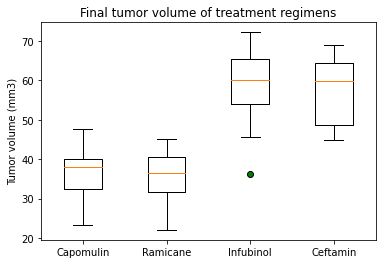

In [43]:
#Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Define final tumor volumes for boxplot 
volumes1_capomulin=[23.343598,28.430964,28.484033,30.485985,31.023923,31.896238,32.377357,33.329098,34.455298,36.041047,37.074024,                  
                   37.311846,38.125164,38.753265,38.846876,38.939633,38.982878,39.952347,40.159220,40.658124,40.728578,41.483008,                   
                   41.581521,46.539206,47.685963] 

volumes1_ramicane=[22.050126,29.128472,30.276232,30.564625,30.638696,31.095335,31.560470,32.978522,33.397653,33.562402,36.134852,                  
                   36.374510,36.561652,37.225650,37.311236,38.342008,38.407618,38.810366,40.659006,40.667713,43.047543,43.166373,                  
                   43.419381,44.183451,45.220869]   

volumes1_infubinol=[36.321346,45.699331,46.250112,47.010364,50.005138,51.542431,54.048608,54.656549,55.629428,55.650681,57.031862,                 
                    58.268442,60.165180,60.918767,60.969711,62.117279,62.435404,62.754451,65.525743,66.083066,66.196912,67.289621,                 
                    67.685569,67.973419,72.226731]   

volumes1_ceftamin=[45.000000,45.000000,45.000000,45.000000,46.784535,47.784682,48.722078,52.925348,55.742829,56.057749,57.918381,                 
                   59.741901,59.851956,61.386660,61.433892,61.849023,62.999356,64.192341,64.299830,64.634949,64.729837,67.527482,                 
                   67.748662,68.594745,68.923185] 

#Specify the desired format of the boxplot 
fig1,ax1=plt.subplots()

#shade the outlier as green
green_circle=dict(markerfacecolor='g',marker='o')

#formatting
ax1.set_title('Final tumor volume of treatment regimens')
ax1.set_ylabel('Tumor volume (mm3)')
ax1.boxplot([volumes1_capomulin,volumes1_ramicane,volumes1_infubinol,volumes1_ceftamin], labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops=green_circle)
plt.show()